In [1]:
from RNG import Generator
import numpy as np
import matplotlib.pyplot as plt
import math

In [18]:
randomic = Generator(13,50)
tec=[]

for i in randomic[2:]: 
    tec.append(-20*math.log(i))
        
print(tec)


[6.850052775916015, 3.899160712190344, 0.7654276061460402, 1.53818058443831, 3.3336240121390492, 9.834189778673633, 3.84158854383182, 3.7060412608398257, 37.80849599074521, 0.29157496056015325, 5.689402409045056, 4.399234886183311, 15.995172372256627, 7.276832536614709, 2.418452630137276, 6.433272739557073, 46.03642354805417, 0.31438891658725954, 2.8094148522443514, 17.004551786028436, 1.4934955018766902, 8.410670660468165, 46.93608380159137, 173.6441149661889, 3.2486349337259286, 32.63944019147241, 13.825119005872534, 17.930171945623773, 43.17355201379297, 3.626342115702913, 1.9175674738741746, 17.740031667572076, 9.65647139044043, 11.275229903997218, 26.406766425929643, 29.895293473701678, 3.6463595191639397, 2.4775963979423485, 5.76957527630456, 31.070084311232378, 5.145547751465419, 18.598403337613043, 4.622862888409577, 15.111455912493486, 1.1331747622249138, 31.094133834759795, 13.815293560280555, 12.130966948835411, 7.909851783760441, 0.7243167087543365]


<BarContainer object of 174 artists>

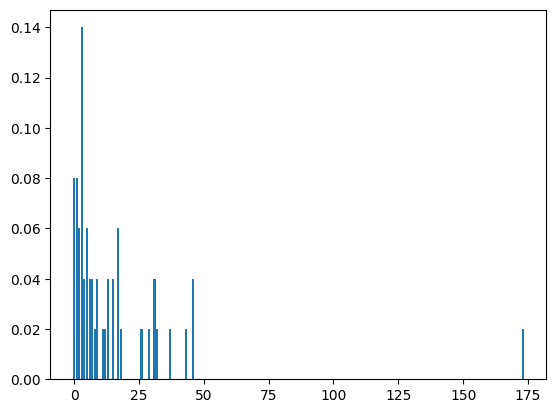

In [20]:
# Contar as ocorrências de cada valor no vetor
ocorrencias = np.bincount(tec)

# Calcular a proporção em relação ao total
total = len(tec)
proporcoes = ocorrencias / total

# Criar um gráfico de barras
plt.bar(range(len(proporcoes)), proporcoes)

In [21]:
ts=[]
for i in randomic[2:]: 
    ts.append(-5*math.log(i)+20)
        
print(ts)

[21.712513193979003, 20.974790178047584, 20.19135690153651, 20.384545146109577, 20.833406003034764, 22.458547444668408, 20.960397135957955, 20.926510315209956, 29.4521239976863, 20.07289374014004, 21.422350602261265, 21.099808721545827, 23.998793093064158, 21.819208134153676, 20.60461315753432, 21.608318184889267, 31.50910588701354, 20.078597229146816, 20.702353713061086, 24.251137946507107, 20.373373875469174, 22.102667665117043, 31.73402095039784, 63.41102874154723, 20.81215873343148, 28.1598600478681, 23.456279751468134, 24.482542986405942, 30.793388003448243, 20.906585528925728, 20.479391868468543, 24.43500791689302, 22.414117847610108, 22.818807475999304, 26.60169160648241, 27.47382336842542, 20.911589879790984, 20.619399099485587, 21.44239381907614, 27.767521077808095, 21.286386937866354, 24.64960083440326, 21.155715722102393, 23.77786397812337, 20.283293690556228, 27.773533458689947, 23.453823390070138, 23.032741737208852, 21.97746294594011, 20.181079177188582]


<BarContainer object of 64 artists>

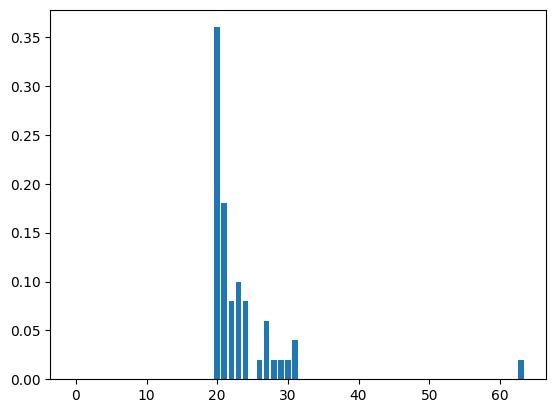

In [23]:
# Contar as ocorrências de cada valor no vetor
ocorrencias = np.bincount(ts)

# Calcular a proporção em relação ao total
total = len(ts)
proporcoes = ocorrencias / total

# Criar um gráfico de barras
plt.bar(range(len(proporcoes)), proporcoes, tick_label=range(len(proporcoes)))